## Supervised ML algorithms
By the end of this lecture, you will be able to
- Summarize how decision trees, random forests, and support vector machines work
- Describe how the predictions of these techniques behave in classification and regression
- Describe which hyper-parameters should be tuned

## Which ML algorithm to try on your dataset?

- there is no algo that performs well under all conditions!
- you need to try a few to find the one that performs best
- but you might be able to exclude some algos in advance
   - large dataset (>1e6 points)
   - more features than  points
- other than predictive power, what else is important for you?
   - how the model behaves with respect to outliers?
   - does the prediction varies smoothly with the feature values?
   - can the model capture non-linear dependencies?
   - is the model easy to interpret for a human?

### Goal for today: fill out this table:

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|<font color='red'>tbd</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|<font color='red'>tbd</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|


## Linear regression

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

reg = LinearRegression()
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


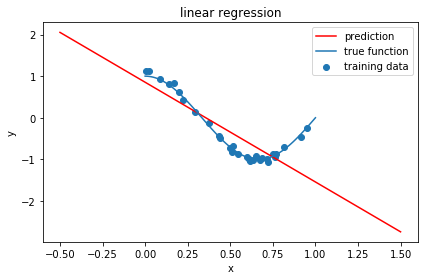

In [3]:
import matplotlib.pyplot as plt
import matplotlib 
plt.scatter(X,y,label='training data')
plt.plot(X_new,y_new,'r',label='prediction')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression')
plt.legend()
plt.tight_layout()
plt.savefig('figures/lin_reg.png',dpi=300)
plt.show()

## Logistic regression

In [5]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.linear_model import LogisticRegression
# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = LogisticRegression()
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

/anaconda3/envs/datasci_v0.0.2_local4.yml/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

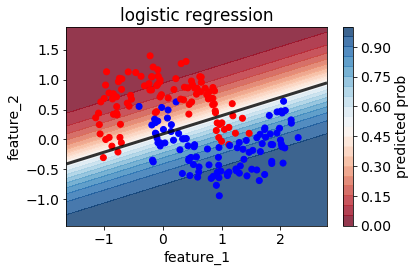

In [4]:
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams.update({'font.size': 14})

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('logistic regression')
plt.tight_layout()
plt.savefig('figures/logistic_reg.png',dpi=300)
plt.show()

<center><img src="figures/logistic_reg.png" width="700"></center>

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|<font color='red'>linear extrapolation</font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|<font color='red'>scales with distance from the decision boundary </font>|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|



## <center>Decision trees and random forests</center>

- Decision tree: the data is split according to certain features
- Here is an example tree fitted to data:

<center><img src = 'figures/Decision-Trees-modified-1.png' width="500"></center>

<center><img src = 'figures/Decision-Trees-modified-1.png' width="500"></center>

- Trees have nodes and leaves.
- The critical values and features in the nodes are determined automatically by minimizing a cost function.

- Random forest: ensemble of random decision trees
- Each tree sees a random subset of the training data, that's why the forest is random.

<center><img src="figures/tree.png" width="450"></center>



### A decision tree in regression

In [6]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(0, 1, 1000)

reg = RandomForestRegressor(n_estimators=1,max_depth=1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


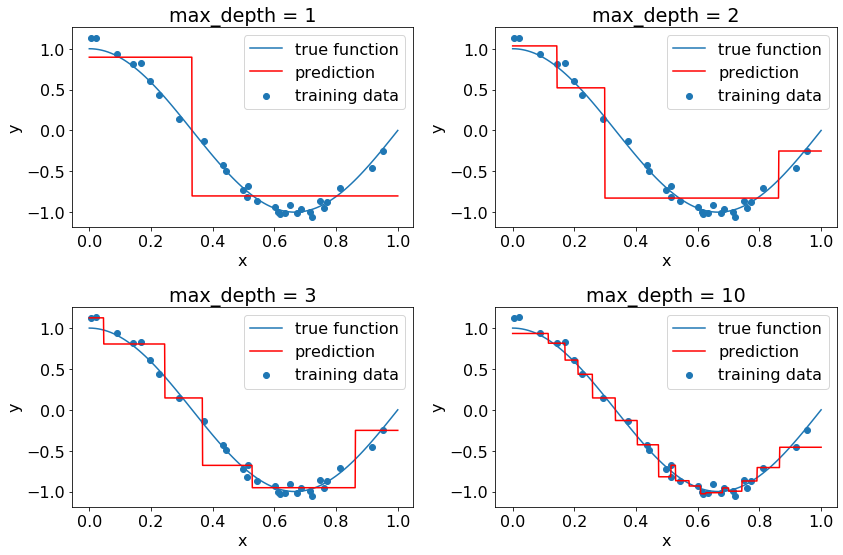

In [6]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 1')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=2)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 2')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=3)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 3')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = RandomForestRegressor(n_estimators=1,max_depth=10)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('max_depth = 10')
plt.legend()

plt.tight_layout()
plt.savefig('figures/tree_reg.png',dpi=300)
plt.show()


<center><img src="figures/tree_reg.png" width="800"></center>

## How to avoid overfitting with random forests?
- tune some (or all) of following hyperparameters:
   - **max_depth**
   - min_samples_split
- With sklearn random forests, **do not tune n_estimators**!
   - the larger this value is, the better the forest will be
   - set n_estimators to maybe a 100 while tuning hyperparameters
   - increase it if necessary once the best hyperparameters are found


| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|<font color='red'>so so</font> |<font color='red'>constant</font>|<font color='red'>yes</font>|<font color='red'>max_features,  max_depth</font>| <font color='red'>no</font>|<font color='red'>so so</font>|
| random forest classification 	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

## A random forest in classification

In [7]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = RandomForestClassifier(n_estimators=1,max_depth=3,random_state=0)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

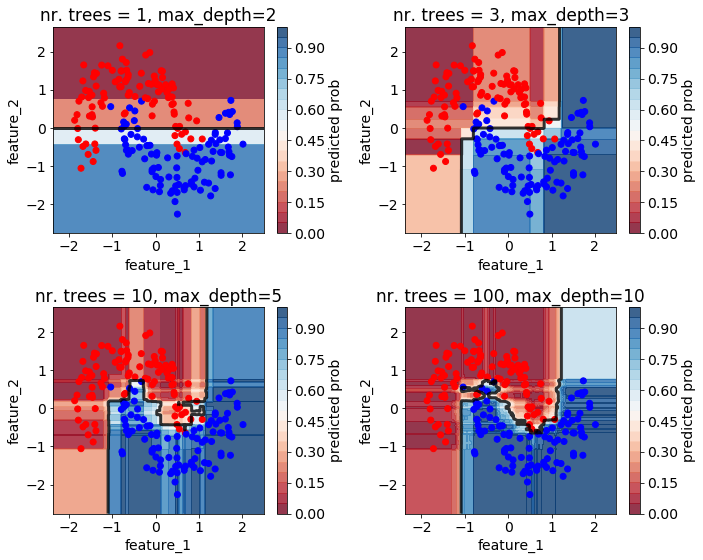

In [8]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = RandomForestClassifier(n_estimators=1,max_depth=2,random_state=1)

clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 1, max_depth=2')

plt.subplot(2,2,2)
clf = RandomForestClassifier(n_estimators=3,max_depth=3,random_state=4)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 3, max_depth=3')

plt.subplot(2,2,3)
clf = RandomForestClassifier(n_estimators=10,max_depth=5,random_state=3)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 10, max_depth=5')

plt.subplot(2,2,4)
clf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=3)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('nr. trees = 100, max_depth=10')


plt.tight_layout()

plt.savefig('figures/forest_clf.png',dpi=300)
plt.show()




<center><img src="figures/forest_clf.png" width="800"></center>

### <center>Exercise 1 </center>
- Create a decision tree with max_depth = 2 to predict the target variable! What is your tree's prediction for each person?
- Remember, your tree does not need predict everyone perfectly.
- It just needs to get as many people as possible right.

| X|age|gender (M=0, F=1)|is student?|is parent?|uses computer for work?|nr. of hours on c.|<font color='red'>Like computer games?</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__person 1__| 5|0|1|0|0|0.0|__<font color='red'>1</font>__|
|__person 2__|48|1|0|1|0|1.8|__<font color='red'>1</font>__|
|__person 3__|62|0|0|1|0|0.2|__<font color='red'>0</font>__|
|__person 4__|10|1|1|0|0|2.4|__<font color='red'>1</font>__|
|__person 5__|23|1|1|0|1|4.2|__<font color='red'>0</font>__|
|__person 6__|36|0|0|0|1|3.1|__<font color='red'>1</font>__|
|__person 7__|12|0|1|0|0|3.1|__<font color='red'>1</font>__|
|__person 8__|85|0|0|0|1|1.0|__<font color='red'>0</font>__|
|__person 9__|33|1|1|1|0|1.5|__<font color='red'>0</font>__|
|__person 10__|56|0|0|0|1|0.1|__<font color='red'>1</font>__|

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so|constant|yes|max_features,  max_depth|no|so so|
| random forest classification 	|<font color='red'>so so</font> |<font color='red'>step-like, difficult to tell</font>|<font color='red'>yes</font>|<font color='red'>max_features,  max_depth</font>| <font color='red'>no</font>|<font color='red'>so so</font>|
| SVM rbf regression               	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

## Support Vector Machine
- very versatile technique, it comes in lots of flavors/types, read moree about it [here](https://scikit-learn.org/stable/modules/svm.html)
- SVM classifier motivation
   - points in n dimensional space with class 0 and 1
   - we want to find the (n-1) dimensional hyperplane that best separates the points
   - this hyperplane is our (linear) decision boundary
- we cover SVMs with radial basis functions (rbf)
   - we apply a kernel function (a non-linear transformation) to the data points
   - the kernel function basically "smears" the  points
   - gaussian rbf kernel: $\exp(-\gamma (|x - x'|)^2)$ where $\gamma > 0$

## SVR

In [9]:
import numpy as np
from sklearn.svm import SVR
np.random.seed(10)
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30

X = np.random.rand(n_samples)
y = true_fun(X) + np.random.randn(n_samples) * 0.1

X_new = np.linspace(-0.5, 1.5, 2000)

reg = SVR(gamma = 1, C = 1)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])


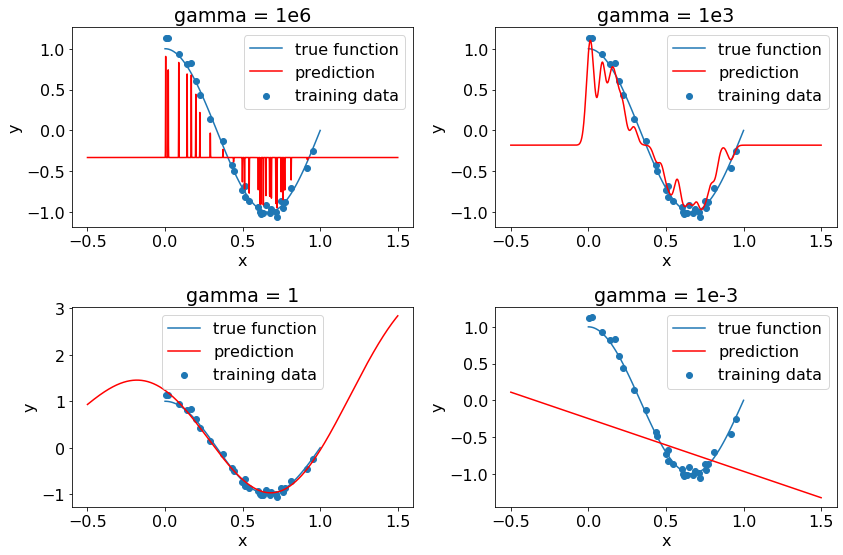

In [10]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1000000, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e6')
plt.legend()

plt.subplot(2,2,2)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1000, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e3')
plt.legend()

plt.subplot(2,2,3)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 1, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1')
plt.legend()


plt.subplot(2,2,4)
plt.scatter(X,y,label='training data')
plt.plot(np.linspace(0, 1, 100),true_fun(np.linspace(0, 1, 100)),label='true function')
reg = SVR(gamma = 0.001, C = 100)
reg.fit(X[:, np.newaxis],y)
y_new = reg.predict(X_new[:, np.newaxis])
plt.plot(X_new,y_new,'r',label='prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('gamma = 1e-3')
plt.legend()

plt.tight_layout()
plt.savefig('figures/SVM_reg.png',dpi=300)
plt.show()


<center><img src="figures/SVM_reg.png" width="800"></center>

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_features,  max_depth| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_features,  max_depth| no|so so|
| SVM rbf regression               	|<font color='red'>no</font>|<font color='red'>non-linear extrapolation</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so</font>|
| SVM rbf classification           	|              tbd             	|           tbd          	|     tbd     	|        tbd       	| tbd | tbd|

## SVC

In [11]:
from sklearn.datasets import make_moons
import numpy as np
from sklearn.svm import SVC

# create the data
X,y = make_moons(noise=0.2, random_state=1,n_samples=200)
# set the hyperparameters
clf = SVC(gamma = 1, C = 1, probability=True)
# fit the model
clf.fit(X,y)
# predict new data
#y_new = clf.predict(X_new)
# predict probabilities
#y_new = clf.predict_proba(X_new)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

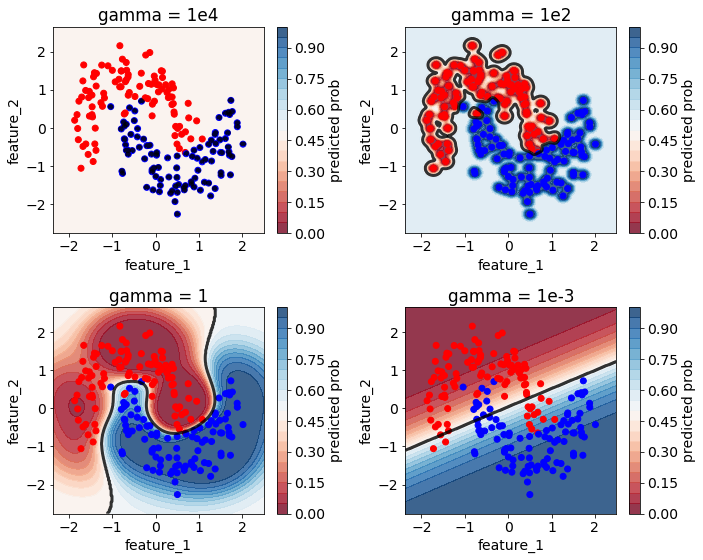

In [12]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

matplotlib.rcParams.update({'font.size': 14})

X = StandardScaler().fit_transform(X)

h = .02  # step size in the mesh

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.figure(figsize=(10,8))
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
cm = plt.cm.RdBu

plt.subplot(2,2,1)
clf = SVC(gamma = 1e4, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e4')

plt.subplot(2,2,2)
clf = SVC(gamma = 1e2, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e2')

plt.subplot(2,2,3)
clf = SVC(gamma = 1e0, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1')

plt.subplot(2,2,4)
clf = SVC(gamma = 1e-3, C = 100, probability=True)
clf.fit(X,y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8,vmin=0,vmax=1,levels=np.arange(0,1.05,0.05))
plt.colorbar(label='predicted prob')
plt.contour(xx, yy, Z, alpha=.8,vmin=0,vmax=1,levels=[0.5],colors=['k'],linewidths=3)
plt.scatter(X[:, 0], X[:, 1], c=y,cmap=cm_bright)
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.title('gamma = 1e-3')


plt.tight_layout()

plt.savefig('figures/SVM_clf.png',dpi=300)
plt.show()




<center><img src="figures/SVM_clf.png" width="800"></center>

## Exercise 2
Identify high bias and high variance models!

| ML algo                      	| suitable for large datasets? 	| behaviour wrt outliers 	| non-linear? 	|  params to tune  	|smooth predictions| easy to interpret?|
|------------------------------	|:----------------------------:	|:----------------------:	|:-----------:	|:----------------:	|:----------------:	|:----------------:	|
| linear regression            	|              yes             	|linear extrapolation|      no     	| l1 and/or l2 reg 	| yes | yes|
| logistic regression          	|              yes             	|scales with distance from the decision boundary|      no     	| l1 and/or l2 reg 	| yes | yes|
| random forest regression     	|so so |constant|yes|max_features,  max_depth| no|so so|
| random forest classification 	|so so |step-like, difficult to tell|yes|max_features,  max_depth| no|so so|
| SVM rbf regression               	|no|non-linear extrapolation|yes|C, gamma|yes|so so|
| SVM rbf classification           	|<font color='red'>no</font>|<font color='red'>50-50</font>|<font color='red'>yes</font>|<font color='red'>C, gamma</font>|<font color='red'>yes</font>|<font color='red'>so so </font>|